# Projeto 2 - Curso Fundamento de Linguagem Python para Análise de Dados e Data Science

O objetivo é responder 10 perguntas de negócio a partir de um dataset
sobre uma rede de varejo que comercializa diversos produtos em diversas cidades dos EUA.

# Leitura da Base de Dados

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [40]:
# prompt: Gera uma conexão com google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# Leitura do arquivo .csv
df = pd.read_csv('/content/drive/MyDrive/2-Estudos/2-Qualificação Profissional/2-Cursos em Andamento com certificado/Python Para Análise de Dados e Data Science/Cap13 - Projeto Varejo/23-Cap13/dados/dataset.csv')

In [42]:
# Dimensão da base
df.shape

(9700, 11)

In [43]:
# Visualizando as primeira observações
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


# Estatística Descritiva: Medidas de Posição, Disperção e Tabelas

In [44]:
# Valores Faltantes
df.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [45]:
# Valores Faltantes
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [46]:
# Estatística das Variáveis Quantitativas
df.describe()

,Valor_Venda
count,9700.000000
mean,230.469892
std,627.504252
min,0.444000
25%,17.248000
50%,54.272000
75%,209.932500
max,22638.480000


In [47]:
# Construindo tabelas para variáveis qualitativas
# Clientes
df.groupby('ID_Cliente', as_index = False)['ID_Cliente'].value_counts().sort_values('count', ascending = False)

,ID_Cliente,count
787,WB-21850,35
482,MA-17560,34
606,PP-18955,34
387,JL-15835,33
147,CK-12205,32
...,...,...
42,AO-10810,1
403,JR-15700,1
456,LD-16855,1
145,CJ-11875,1


In [48]:
# Construindo tabelas para variáveis qualitativas
# Segmento
df.groupby('Segmento', as_index = False)['Segmento'].value_counts()

,Segmento,count
0,Consumer,5039
1,Corporate,2930
2,Home Office,1731


In [49]:
# Construindo tabelas para variáveis qualitativas
# Pais
df.groupby('Pais', as_index = False)['Pais'].value_counts()

,Pais,count
0,United States,9700


In [50]:
# Construindo tabelas para variáveis qualitativas
# Cidade
df.groupby('Cidade', as_index = False)['Cidade'].value_counts()

,Cidade,count
0,Aberdeen,1
1,Abilene,1
2,Akron,20
3,Albuquerque,14
4,Alexandria,16
...,...,...
523,Woonsocket,4
524,Yonkers,15
525,York,5
526,Yucaipa,1


In [51]:
# Construindo tabelas para variáveis qualitativas
# Estado
df.groupby('Estado', as_index = False)['Estado'].value_counts().sort_values('count', ascending = False)

,Estado,count
3,California,1929
30,New York,1092
41,Texas,957
36,Pennsylvania,573
45,Washington,498
11,Illinois,476
33,Ohio,447
8,Florida,370
20,Michigan,252
31,North Carolina,247


In [52]:
# Construindo tabelas para variáveis qualitativas
# Produto
df.groupby(['ID_Produto'], as_index = False)['ID_Produto'].value_counts().sort_values('count', ascending = False)

,ID_Produto,count
1144,OFF-PA-10001970,19
1568,TEC-AC-10003832,18
295,FUR-FU-10004270,16
93,FUR-CH-10002647,15
1516,TEC-AC-10002049,15
...,...,...
1671,TEC-MA-10004255,1
1672,TEC-MA-10004458,1
1673,TEC-MA-10004521,1
1674,TEC-MA-10004552,1


In [53]:
# Construindo tabelas para variáveis qualitativas
# Categoria
df.groupby(['Categoria'], as_index = False)['Categoria'].value_counts().sort_values('count', ascending = False)

,Categoria,count
1,Office Supplies,5851
0,Furniture,2055
2,Technology,1794


In [54]:
# Construindo tabelas para variáveis qualitativas
# Sub-Categoria
df.groupby(['SubCategoria'], as_index = False)['SubCategoria'].value_counts().sort_values('count', ascending = False)

,SubCategoria,count
3,Binders,1470
12,Paper,1329
9,Furnishings,925
13,Phones,867
14,Storage,825
2,Art,778
0,Accessories,746
5,Chairs,596
1,Appliances,454
10,Labels,354


# Pergunta de Negócio 1:
* Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'

In [55]:
# Vetor booleano da categoria 'Office Supplies'
cond = df.Categoria == 'Office Supplies'

# A lista  'cond' irá filtrar o dataset para Categoria 'Office Supplies'
df[cond].groupby('Cidade', as_index = False).sum('Valor_Venda').sort_values('Valor_Venda', ascending = False).head(5)

,Cidade,Valor_Venda
295,New York City,68362.814
239,Los Angeles,47098.100
392,San Francisco,41771.198
406,Seattle,34856.878
335,Philadelphia,29313.687


# Pergunta de Negócio 2:
* Qual o Total de Vendas Por Data do Pedido?\
Demonstre o resultado através de um gráfico de barras.

Total de vendas, pode ser interpretado como a quantidade de produtos vendidos ou o valor da venda com os produtos

## Quantidade de Produtos Vendidos

In [56]:
# Convertendo a Data do Pedido para um objeto datetime
df.Data_Pedido = pd.to_datetime(df.Data_Pedido, dayfirst=True)

df_2 = df.groupby('Data_Pedido', as_index = False)['Data_Pedido'].value_counts().sort_values('Data_Pedido', ascending = False)
df_2.head()

,Data_Pedido,count
1225,2018-12-30,7
1224,2018-12-29,12
1223,2018-12-28,19
1222,2018-12-27,2
1221,2018-12-26,4


<Axes: xlabel='Data_Pedido'>

<Figure size 2000x600 with 0 Axes>

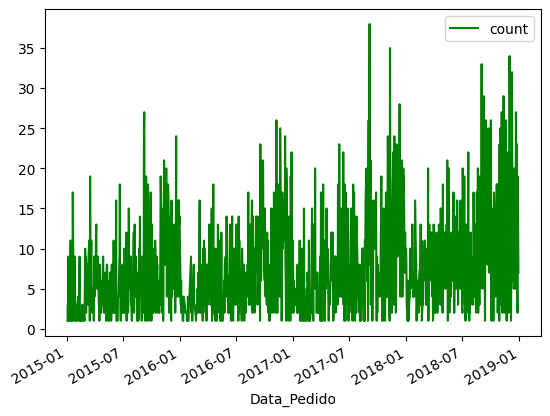

In [57]:
plt.figure(figsize = (20,6))
df_2.plot(x = 'Data_Pedido', y = 'count', color = 'green')

## Valor das Vendas dos Produtos

In [58]:
df_2_ = df.groupby('Data_Pedido', as_index = False)['Valor_Venda'].sum().sort_values('Data_Pedido', ascending = False)
df_2_.head()

,Data_Pedido,Valor_Venda
1225,2018-12-30,713.7900
1224,2018-12-29,2915.5340
1223,2018-12-28,1657.3508
1222,2018-12-27,177.6360
1221,2018-12-26,814.5940


<Axes: xlabel='Data_Pedido'>

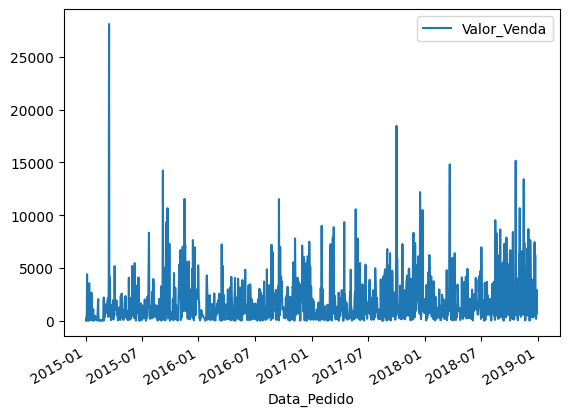

In [59]:
df_2_.plot(x = 'Data_Pedido', y = 'Valor_Venda')

# Pergunta de Negócio 3:
* Qual o Total de Vendas por Estado?
Demonstre o resultado através de um gráfico de barras.

Total de vendas, pode ser interpretado como a quantidade de produtos vendidos ou o valor da venda com os produtos

## Quantidade de Produtos Vendidos

In [60]:
df_3 = df.groupby('Estado', as_index = False)['Estado'].value_counts().sort_values('count', ascending = False)
df_3.head()

,Estado,count
3,California,1929
30,New York,1092
41,Texas,957
36,Pennsylvania,573
45,Washington,498


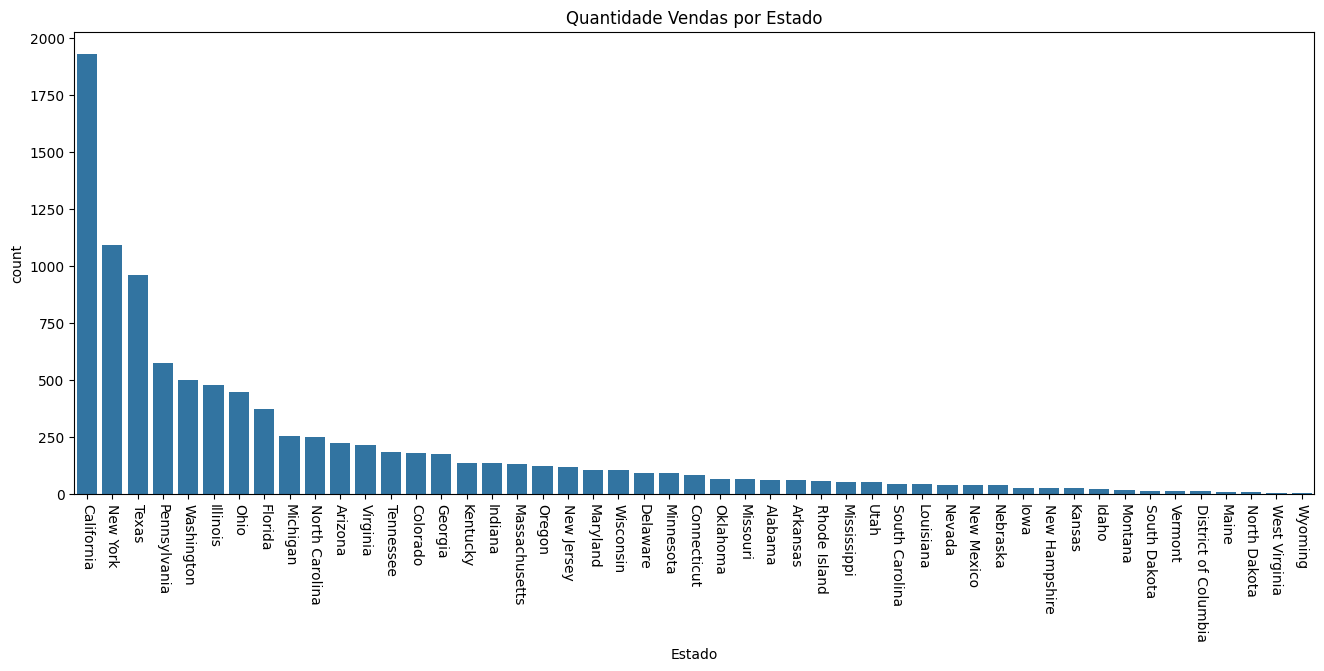

In [61]:
plt.figure(figsize = (16, 6))

sea.barplot(data = df_3, x = 'Estado', y = 'count').set(title = 'Quantidade Vendas por Estado')
plt.xticks(rotation = 270)

plt.show()

## Valor das Vendas dos Produtos

In [62]:
df_3_ = df.groupby('Estado', as_index = False)['Valor_Venda'].mean().sort_values('Valor_Venda', ascending = False)
df_3_.head()

,Estado,Valor_Venda
48,Wyoming,1603.136000
43,Vermont,452.447000
26,Nevada,428.951333
37,Rhode Island,409.545927
24,Montana,372.623467


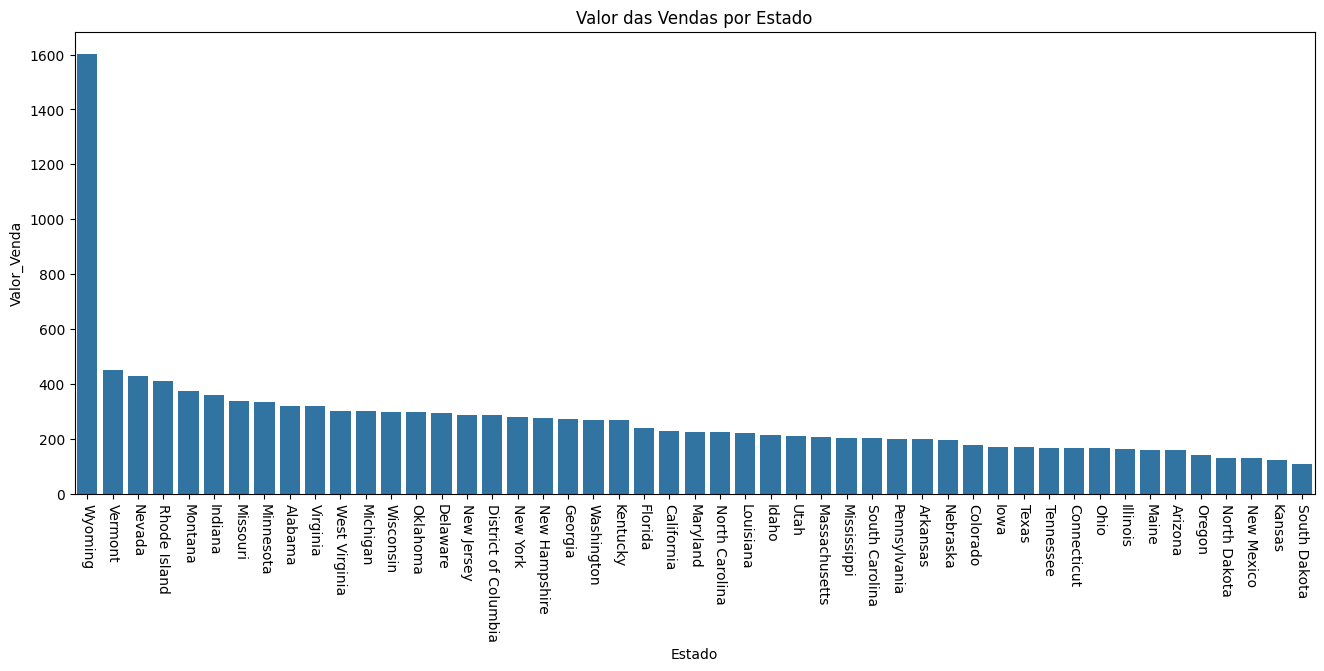

In [63]:
plt.figure(figsize = (16, 6))

sea.barplot(data = df_3_, x = 'Estado', y = 'Valor_Venda').set(title = 'Valor das Vendas por Estado')
plt.xticks(rotation = 270)

plt.show()

# Pergunta de Negócio 4:
* Quais São as 10 Cidades com Maior Total de Vendas?
Demonstre o resultado através de um gráfico de barras.

In [64]:
df_4 = df.groupby('Cidade', as_index = False)['Valor_Venda'].sum().sort_values('Valor_Venda', ascending = False).head(10)
df_4

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


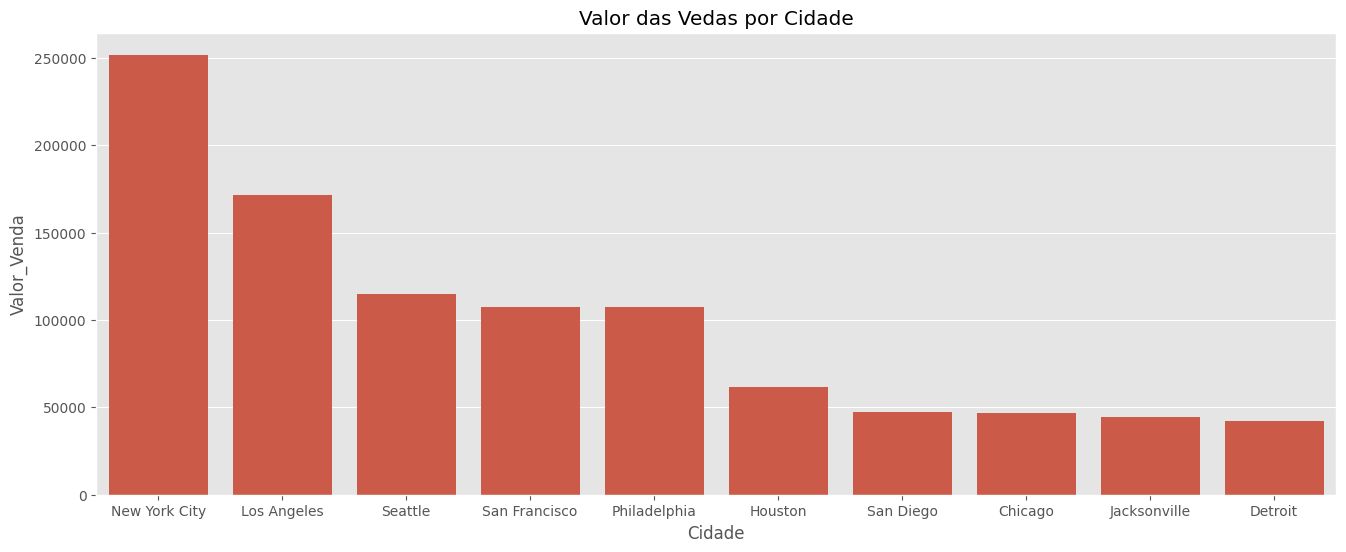

In [65]:
plt.style.use('ggplot')
plt.figure(figsize = (16, 6))

sea.barplot(data = df_4, x = 'Cidade', y = 'Valor_Venda').set(title = 'Valor das Vedas por Cidade')

plt.show()

# Pergunta de Negócio 5:
* Qual Segmento Teve o Maior Total de Vendas?
Demonstre o resultado através de um gráfico de pizza.


In [66]:
df_5 = df.groupby('Segmento', as_index = False)['Valor_Venda'].sum().sort_values('Valor_Venda', ascending = False)
df_5.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


Text(0.5, 1.0, 'Valor das Vendas por Segmento')

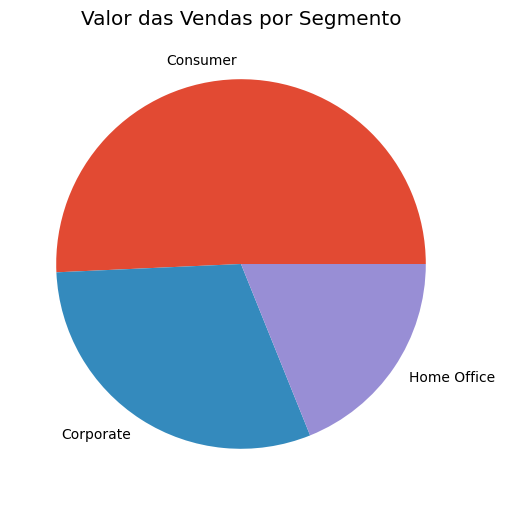

In [67]:
plt.figure(figsize = (16,6))

plt.pie(x = df_5.Valor_Venda, labels = df_5.Segmento)

plt.title('Valor das Vendas por Segmento')

# Pergunta de Negócio 6 (Desafio Nível Baby):
Qual o Total de Vendas Por Segmento e Por Ano?

In [68]:
import datetime as dt

In [69]:
df['Ano'] = [data.year for data in df.Data_Pedido]
df.groupby(['Ano', 'Segmento'], as_index = False)['Valor_Venda'].sum().sort_values('Ano')

,Ano,Segmento,Valor_Venda
0,2015,Consumer,256719.9166
1,2015,Corporate,125819.5957
2,2015,Home Office,88229.0878
3,2016,Consumer,265295.2593
4,2016,Corporate,114643.1229
5,2016,Home Office,74134.1332
6,2017,Consumer,288459.5572
7,2017,Corporate,203266.7398
8,2017,Home Office,103639.6270
9,2018,Consumer,323359.6019


# Pergunta de Negócio 7 (Desafio Nível Júnior):
Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

1. Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
2. Quantas Vendas Receberiam 15% de Desconto?

In [70]:
df['Desconto'] = [15 if valor >= 1000 else 10 for valor in df.Valor_Venda]

In [71]:
df ['Desconto'].value_counts()

Desconto
10    9243
15     457
Name: count, dtype: int64

# Pergunta de Negócio 8 (Desafio Nível Master):
Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [72]:
# Média do Valor das Vendas antes do Desconto
media_antes = round(df.Valor_Venda.mean(), 2)

In [73]:
# Desconto em %
desconto = [1-0.15 if desconto == 15 else 1 for desconto in df.Desconto]

In [74]:
# Flag desconto
media_depois = round((desconto*df.Valor_Venda).mean(), 2)

In [75]:
print('A média antes do desconto é {}. Após o desconto de 15% a média do valor das vendas passa a ser {}'.format(media_antes, media_depois))

A média antes do desconto é 230.47. Após o desconto de 15% a média do valor das vendas passa a ser 215.51


# Pergunta de Negócio 9 (Desafio Nível Master Ninja):
Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?
Demonstre o resultado através de gráfico de linha.

In [80]:
df['Mês'] = [data.month for data in df.Data_Pedido]

In [78]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Mês
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,10,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,10,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,10,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,10,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,10,10


In [79]:
df.groupby(['Ano', 'Mês', 'Segmento'])['Valor_Venda'].mean()

Ano   Mês  Segmento   
2015  1    Consumer       146.736787
           Corporate      130.886769
           Home Office    329.855882
      2    Consumer       117.327926
           Corporate       69.235333
                             ...    
2018  11   Corporate      341.215278
           Home Office    247.519423
      12   Consumer       183.616244
           Corporate      153.167403
           Home Office    224.523983
Name: Valor_Venda, Length: 144, dtype: float64

<Figure size 1600x600 with 0 Axes>

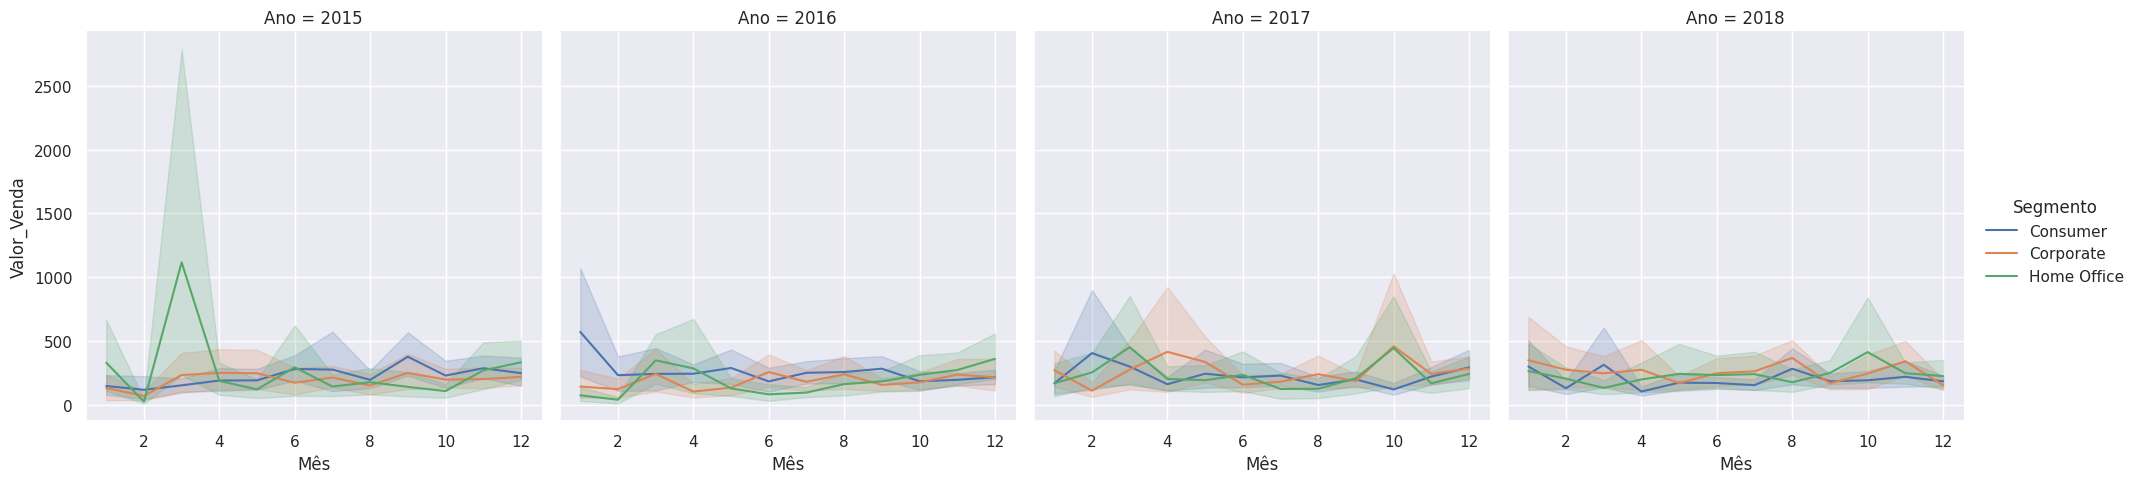

In [81]:
plt.figure(figsize = (16, 6))
sea.set()

sea.relplot(data = df,
            kind = 'line',
            x = 'Mês',
            y = 'Valor_Venda',
            hue = 'Segmento',
            col = 'Ano',
            col_wrap = 4)

# Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):
Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?
Demonstre tudo através de um único gráfico.

In [82]:
# Agrupar por categoria e subcategoria e calculando a soma somente para variáveis numéricas
df_10 = df.groupby(['Categoria', 'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda', ascending = False).head(12)

In [83]:
# Convertendo a coluna Valor_Venda em número inteiro (não é necessário) e classificando por categoria
df_10 = df_10.sort_values('Categoria').reset_index()

In [84]:
df_10

,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Mês
0,Furniture,Chairs,317919.6250,1201942,6330,4834
1,Furniture,Tables,202083.3600,627193,3415,2466
2,Furniture,Bookcases,108045.0467,449734,2350,1706
3,Furniture,Furnishings,88862.7700,1865489,9275,7301
4,Office Supplies,Storage,216188.3620,1663791,8475,6548
5,Office Supplies,Binders,194723.3810,2964618,14910,11451
6,Office Supplies,Appliances,104061.6930,915604,4645,3583
7,Office Supplies,Paper,76312.7640,2680255,13290,10404
8,Technology,Phones,325271.2940,1748496,9015,6649
9,Technology,Machines,189238.6310,231912,1365,897


In [85]:
# Criando outro dataframe somente com os totais por categoria
df_10_ = df_10.groupby('Categoria').sum(numeric_only = True).reset_index()

In [86]:
df_10_

,Categoria,Valor_Venda,Ano,Desconto,Mês
0,Furniture,716910.8017,4144358,21370,16307
1,Office Supplies,591286.2000,8224268,41320,31986
2,Technology,823549.3810,3618020,18820,14044


Text(0.5, 1.0, 'Total de Vendas por Categoria e Top 12 SubCategorias')

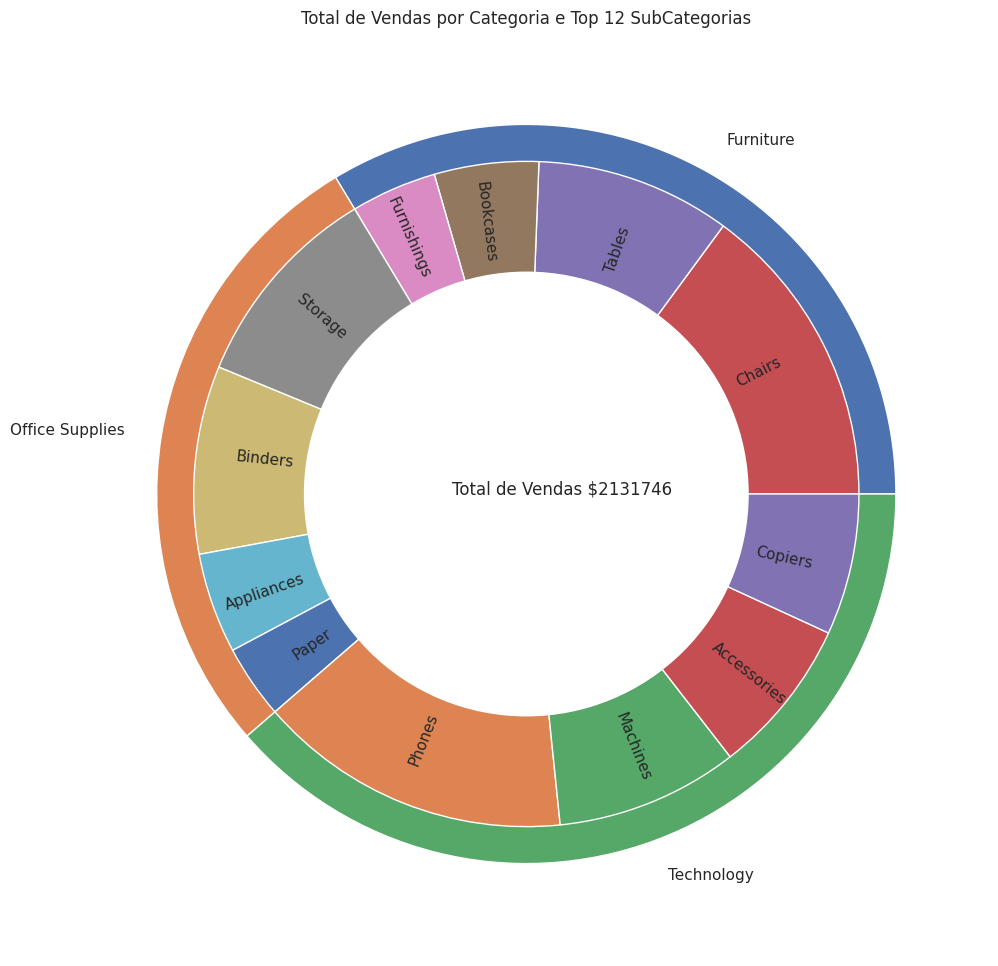

In [93]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18, 12))

# Gráfico das Categorias
p1 = ax.pie(
    x = df_10_['Valor_Venda'],
    radius = 1,
    labels = df_10_['Categoria'],
    wedgeprops = dict(edgecolor = 'white')
)

# Gráfico das subcategorias
p2 = ax.pie(
    x = df_10['Valor_Venda'],
    radius = 0.9,
    labels = df_10['SubCategoria'],
    #autopct = autopct_format(df_10['Valor_Venda']),
    labeldistance = 0.7,
    wedgeprops = dict(edgecolor = 'white'),
    pctdistance = 0.53,
    rotatelabels = True
)

# Limpa o centro do cícurlo
centre_circle = plt.Circle((0,0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas ' + '$' + str(int(sum(df_10['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas por Categoria e Top 12 SubCategorias')